#### As of February 2010, what is your assessment of the worth of Wal-Mart’s stock? 
#### Clearly state any assumptions and utilize all the methods and its variations discussed in the case to value the shares, including the following:
#### 1. The perpetual growth in dividends.
#### 2. Forecasted dividends for the next several years plus sale of stock in the future.
#### 3. The three-stage dividend model.
#### 4. The price/earnings approach using the P/E provided by the case.

### Q1.
#### The perpetual growth in dividends:

##### We want to calculate stock price using this formula:  $ P_{0}=D_{1}/(k_{e}-g)$.
##### According  to the article, we know that $D_{1} = 1.21$ (Wal-Mart's 2011 dividend) and g = 0.05 (from one respected analyst). The only missing info is $ k_{e}$  which can then be calculated using the CAPM model.
##### Note that we also have $ r_{f}  = .0368$ (10-year bond yield), $\beta = .66$ (Bloomberg's beta), and the historical US market risk premium, which is 0.0505, meaning $k_{e} = .0368+.66 \times .0505= .07013$.
#####  Thus $P_{0}=1.21/(.07013-.05)= 60.11$.

### Q2.
##### Forecasted dividends for the next several years plus sale of stock in the future.

##### In this scenario, I assume that dividend will grow at 10.4 percent for the next 5 years as mentioned in Exhibit 4; in other words, $D_{0} = 1.09, D_{1} = 1.20,D_{2} = 1.329,D_{3} = 1.467, D_{4} = 1.619$, and $D_{5} = 1.788$.
##### Starting at Year 6, the dividend grow rate can be calculated using this formula: $g_{6} = (1 - p)\times K_{e, 6}$.
##### Given p = .45, the missing info is $K_{e, 6}$ which can again be calculated using the CAPM model: here I make another assumption that $K_{e, 6} = K_{e}= .07013$.
##### Thus we have $g_{6} = .0386$, and  $P_{6} =  D_{5} \times (1+g_{6})/(K_{e}-g_{6}) = (1.788 \times 1.0386)/(.07013-.0386)=58.83$

##### $P_{0} = 1.20/(1+.07013)^1+1.329/(1+.07013)^2+1.467/(1+.07013)^3+1.619/(1+.07013)^4+(1.788+58.83)/(1+.07013)^5=47.91.$
##### Thus using this forcast method under some assumtions we have $P_{0}=47.91.$

### Q3.
##### The three-stage dividend model.

##### I calculate the stock price based on assumptions I made in Q1 and Q2 while using the supplement excel spread sheet.
##### First (Stage-1), I assume Wal-Mart EPS will be growing at 5 percent per year in the growth period, which corresponds to a 10 percent dividend growth rate in the first 5 years. 
##### PV(Stage-1)= .49+.48+.47+.46+.45=2.36
##### Second(Stage-2), I subsequently assume the EPS will be growing at a rate less than .09% per year in the transation period, meaning when the payout ratio is still 0.45, the corresponding  dividend growth rate  between year 6 and year 17 are 12.69 percent to 42.31 percent.
##### PV(Stage-2)= 0.57+0.67+0.78+0.88+.97+1.05+1.13+1.21+1.27+1.34+1.39=11.25
##### Lastly(Stage-3), I calcuate the dividend grow rate at maturality with a rate of 45 percent, this allows me to calculate the dividend payment for the terminal value at year 18 to be 5.06 dollars, therefore, I can backout  $P_{18} = 5.06/(0.0701-0.0701 \times (1-0.45))=160.3.$
#####  $PV(Stage-3)=160.3/(1+.00701)^{17}=52.08$

##### P_{0} = PV(Stage-1)+PV(Stage-2)+PV(Stage-3)=65.70

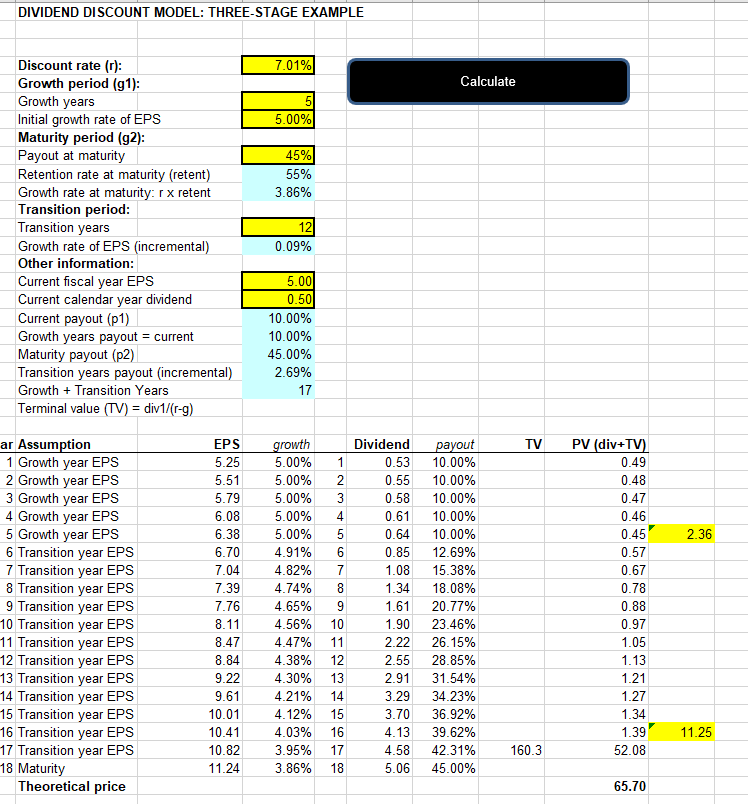

In [3]:
from IPython.display import Image
Image("Q3.png")

### Q4.
##### The price/earnings approach using the P/E provided by the case.

##### $P_{2010} = P/E_{2011} \times (EPS_{2011})$, where EPS= (net income - preferred dividends) ÷ average outstanding common shares.
##### From Exhibit 1(a), we know that $NI_{2011}=14335(MILLION)$(net of preferred dividends) such that  $EPS_{2010}=14335/3866 =3.71.$
#####  $EPS_{2011}=3.71\times 1.104=4.10 $
#####  $P/E_{2011}$ for Walmart is 13.4 according to the Exhibit 7.
#####  $P_{2010} = 13.4 \times 4.10 = 54.94$

### Q5.
##### The price/earnings approach forecasting P/E using polynomial regression. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
df= pd.read_csv("EPS.csv", index_col="Year")
df.head(3)
df_2 = df.drop(['The Gap', 'Dillard\'s', 'J.C. Penney', 'Macy\'s','Safeway'], axis=1)
corrM = df_2.corr()
corrM

,Wal-Mart,Target,Ltd. Brands,Kroger,Supervalu,Costco,S&P 500
Wal-Mart,1.000000,0.800545,0.410722,0.501557,0.382849,0.737941,0.328458
Target,0.800545,1.000000,0.356512,0.628693,0.368484,0.697150,0.517418
Ltd. Brands,0.410722,0.356512,1.000000,0.291068,0.228450,0.240581,-0.373912
Kroger,0.501557,0.628693,0.291068,1.000000,0.640832,0.361159,0.448591
Supervalu,0.382849,0.368484,0.228450,0.640832,1.000000,-0.130933,0.206764
Costco,0.737941,0.697150,0.240581,0.361159,-0.130933,1.000000,0.348518
S&P 500,0.328458,0.517418,-0.373912,0.448591,0.206764,0.348518,1.000000


In [34]:
df_train= df_2.drop(df.tail(1).index)
df_test= df_2.drop(df.head(15).index)

In [40]:
X_train = df_train[['Target','Costco','Kroger']]
Y_train = df_train['Wal-Mart']
X_test= df_test[['Target','Costco','Kroger']]
Y_true = df_test['Wal-Mart']


In [57]:
X1 = PolynomialFeatures(1,interaction_only=True).fit_transform(X_train.values.reshape(-1,3))
X2 = PolynomialFeatures(2,interaction_only=True).fit_transform(X_train.values.reshape(-1,3))
X3 = PolynomialFeatures(3,interaction_only=True).fit_transform(X_train.values.reshape(-1,3))
X4 = PolynomialFeatures(4,interaction_only=True).fit_transform(X_train.values.reshape(-1,3))
X5 = PolynomialFeatures(5,interaction_only=True).fit_transform(X_train.values.reshape(-1,3))

In [58]:
fit_1 = fit = sm.GLS(Y_train, X1).fit()
fit_2 = fit = sm.GLS(Y_train, X2).fit()
fit_3 = fit = sm.GLS(Y_train, X3).fit()
fit_4 = fit = sm.GLS(Y_train, X4).fit()
fit_5 = fit = sm.GLS(Y_train, X5).fit()

print(sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5))

   df_resid         ssr  df_diff     ss_diff         F    Pr(>F)
0      11.0  275.665491      0.0         NaN       NaN       NaN
1       8.0  162.476306      3.0  113.189185  1.860985  0.214514
2       7.0  141.918449      1.0   20.557857  1.013998  0.347480
3       7.0  141.918449     -0.0   -0.000000       NaN       NaN
4       7.0  141.918449     -0.0   -0.000000       NaN       NaN


In [61]:
X1 = PolynomialFeatures(1).fit_transform(X_train.values.reshape(-1,3))
X2 = PolynomialFeatures(2).fit_transform(X_train.values.reshape(-1,3))
fit = sm.GLS(Y_train, X1).fit()
fit.summary()



C:\Users\DELL\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:               Wal-Mart   R-squared:                       0.706
Model:                            GLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     8.787
Date:                Mon, 20 Jun 2022   Prob (F-statistic):            0.00293
Time:                        23:02:36   Log-Likelihood:                -43.118
No. Observations:                  15   AIC:                             94.24
Df Residuals:                      11   BIC:                             97.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4387      7.871     -1.580      0.142     -29.762       4.884
x1             1.0770      0.670      1.607      0.136      -0.398       2.552
x2             0.6755      0.367      1.840      0.093      -0.133       1.484
x3             0.0796      0.484      0.165      0.872      -0.985       1.144
==============================================================================
Omnibus:                        3.660   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                1.919
Skew:                          -0.612   Prob(JB):                        0.383
Kurtosis:                       1.747   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X2_test = PolynomialFeatures(1).fit_transform(X_test.values.reshape(-1,3))
Y_pred = fit.predict(X2_test) 
Y_pred,mean_squared_error(Y_true,Y_pred)

(array([20.56984537]), 35.041334403849255)

### Q6.
##### The price/earnings approach forecasting P/E using polynomial regression with Ridge regression.  

In [217]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error


In [262]:
X = df_train.drop(['Wal-Mart'],axis=1)
y = df_train['Wal-Mart']
X_test = df_test.drop(['Wal-Mart'],axis=1)
Y_true = df_test['Wal-Mart']


In [279]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1]
ridge_cv=RidgeCV(alphas=alphas,normalize=True, store_cv_values=True)
ridge_mod = ridge_cv.fit(X,y)
print(ridge_mod.alpha_)
ypred = ridge_mod.predict(X_test)
ypred,mean_squared_error(Y_true,ypred)

0.1


(array([15.34750446]), 0.48613140675025057)

### Q7.
##### The price/earnings approach forecasting P/E using polynomial regression with Lasso regression. 

In [280]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.8, 1]
lassocv = LassoCV(alphas=alphas,normalize=True, cv=5).fit(X,y)

In [281]:
score = lassocv.score(X,y)
ypred = lassocv.predict(X_test)
print(lassocv.alpha_)
ypred, mean_squared_error(Y_true,ypred)

0.01


(array([13.17671458]), 2.1713750777100738)

### Q8.
##### The price/earnings approach forecasting P/E using regression splines. 

In [298]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from patsy import dmatrix

%matplotlib inline


In [283]:
X_train = df_train['Target']
Y_train = df_train['Wal-Mart']
X_test= df_test['Target']
Y_true = df_test['Wal-Mart']

In [293]:
# linear regression model
x = X_train.values.reshape(-1,1)
y =Y_train.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
print(model.coef_)
print(model.intercept_)

[[1.88879939]]
[-11.55383888]


In [379]:
# Generate a sequence of age values spanning the range
PE_grid = np.arange(X_train.min(), X_train.max()).reshape(-1,1)

transformed_x1 = dmatrix("bs(X_train, knots=(16,20,24), degree=3, include_intercept=False)",
                        {"X_train": X_train}, return_type='dataframe')

fit1 = sm.GLM(Y_train, transformed_x1).fit()
fit1.params

transformed_x2 = dmatrix("bs(train,df=6,degree =3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

fit2 = sm.GLM(Y_train, transformed_x2).fit()
fit2.params

transformed_x3 = dmatrix("cr(train, df=4)", {"train": X_train}, return_type='dataframe')
fit3 = sm.GLM(Y_train, transformed_x3).fit()
fit3.params


pred1 = fit1.predict(dmatrix("bs(PE_grid, knots=(16,20,24), include_intercept=False)",
                             {"PE_grid": PE_grid}, return_type='dataframe'))

pred2 = fit2.predict(dmatrix("bs(PE_grid, df=6, include_intercept=False)",
                             {"PE_grid": PE_grid}, return_type='dataframe'))

pred3 = fit3.predict(dmatrix("cr(PE_grid, df=4)", {"PE_grid": PE_grid}, return_type='dataframe'))


Text(0, 0.5, 'Warmart P/E')

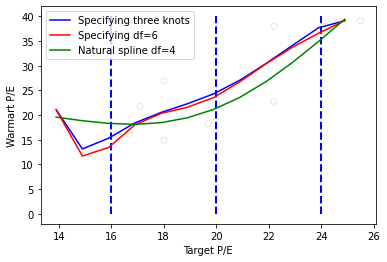

In [380]:
plt.scatter(X_train, Y_train, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(PE_grid, pred1, color='b', label='Specifying three knots')
plt.plot(PE_grid, pred2, color='r', label='Specifying df=6')
plt.plot(PE_grid, pred3, color='g', label='Natural spline df=4')
[plt.vlines(i , 0,40, linestyles='dashed', lw=2, colors='b') for i in [16,20,24]]
plt.legend()
plt.xlabel('Target P/E')
plt.ylabel('Warmart P/E')

In [381]:
pred2 = fit2.predict(dmatrix("bs(PE_grid, df=6, include_intercept=False)",
                             {"PE_grid": X_test}, return_type='dataframe'))

pred2, mean_squared_error(Y_test, pred2)

(Year
 2009    21.08187
 dtype: float64,
 41.36543152094497)